In [26]:
import pandas as pd
data = pd.read_csv('Chicago_crime.csv')

data.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647776,HM172874,2/9/06 22:29,075XX S COLFAX AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,7.0,43.0,19,1194833.0,1855572.0,2006,4/15/16 8:55,41.758607,-87.561511,"(41.758607126, -87.561510616)"
1,4649196,HM157167,2/1/06 12:30,038XX W FERDINAND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,27.0,23.0,19,1150871.0,1903067.0,2006,4/15/16 8:55,41.889909,-87.721389,"(41.889909247, -87.721389051)"
2,4649661,HM159623,2/2/06 19:02,050XX W SUPERIOR ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1142605.0,1904502.0,2006,4/15/16 8:55,41.894005,-87.751710,"(41.89400481, -87.751710086)"
3,4650448,HM158020,2/1/06 20:13,056XX W WASHINGTON BLVD,1661,GAMBLING,GAME/DICE,RESIDENCE PORCH/HALLWAY,True,False,...,29.0,25.0,19,1138430.0,1900175.0,2006,4/15/16 8:55,41.882208,-87.767149,"(41.882207608, -87.767148598)"
4,4650940,HM156984,2/1/06 10:10,015XX W 72ND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,17.0,67.0,19,1167231.0,1856980.0,2006,4/15/16 8:55,41.763106,-87.662629,"(41.763105901, -87.66262925)"


In [32]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') # Look Pretty

data.dropna(axis=0, how = 'any', inplace=True)
data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [21]:
data.Date = pd.to_datetime(data.Date)

In [36]:
def doKMeans(dataframe):
    df = pd.concat([dataframe.Longitude, dataframe.Latitude], axis=1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x = df.Longitude, y = df.Latitude, marker = '.', alpha=0.3, s=30)
    

In [33]:
# Use K-means to try and find seven cluster centers in this dataframe
kmeans_model = KMeans(n_clusters = 7, init = 'random', n_init = 60, max_iter = 360, random_state = 43)
labels = kMeans_model.fit_predict(data) 

# Print and plot the centroids
centroids = kmeans_model.cluster_centers_
ax.scatter(x = centroids[:,0], y = centroids[:,1], marker='x', c='red', alpha=0.7, linewidths=3, s = 120)
print centroids

ValueError: could not convert string to float: (41.791722442, -87.653596123)

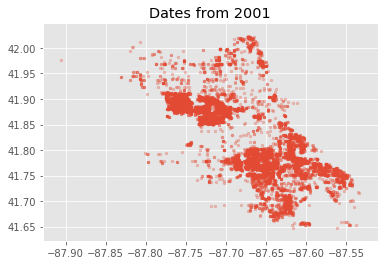

In [42]:
doKMeans(data)
plt.title("Dates from 2001")
plt.show()

In [38]:
df = data[data.Date > '2011-01-01']

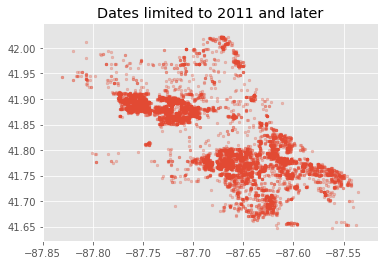

In [41]:
doKMeans(df)
plt.title("Dates limited to 2011 and later")
plt.show()